In [ ]:
! pip install netpbmfile

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
import PIL 
from sklearn.utils import shuffle
import os
import re
from netpbmfile import NetpbmFile
import pickle
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean 

In [ ]:
def imread(filename, byteorder=None):
    """Return image data from Netpbm file as numpy array."""
    with NetpbmFile(filename) as netpbm:
        image = netpbm.asarray(byteorder=byteorder)
    return image

**Face List** 

In [ ]:
'''
os.chdir(r'/content/drive/My Drive/CNN Visual Notebook/faces')
lis = os.listdir()
face_list = []
for data in lis:
  image = imread(data)
  face_list.append(np.array(image))
'''

"\nos.chdir(r'/content/drive/My Drive/CNN Visual Notebook/faces')\nlis = os.listdir()\nface_list = []\nfor data in lis:\n  image = imread(data)\n  face_list.append(np.array(image))\n"

In [ ]:
'''
fileobj = open(r"/content/drive/My Drive/CNN Visual Notebook/faceslist.pkl",'wb')
pickle.dump(face_list,fileobj)
fileobj.close()
'''

'\nfileobj = open(r"/content/drive/My Drive/CNN Visual Notebook/faceslist.pkl",\'wb\')\npickle.dump(face_list,fileobj)\nfileobj.close()\n'

In [ ]:
temp = open(r"faceslist.pkl",'rb')
faces_list = pickle.load(temp)
temp.close()

In [ ]:
faces_list = np.array(faces_list)
faces_list.shape

(2429, 19, 19)

In [ ]:
final_faces_list = faces_list.reshape(2429, 361)

In [ ]:
ss =StandardScaler()
final_faces_list = ss.fit_transform(final_faces_list)

**Task a)**

In [ ]:
def pca_function(X, k):
  sigma = np.cov(X.T)
  eigval, eigvec = np.linalg.eig(sigma)
  u_reduce=eigvec[:, :k]
  Z = np.dot(X, u_reduce)
  return Z, eigval, eigvec, u_reduce
face_Z, face_eigval, face_eigvec, face_u_reduce= pca_function(final_faces_list, k=2)

In [ ]:
def reconstruction(z, u_reduce):
  x = np.dot(z, u_reduce.T)
  return x

In [ ]:
#eigpairs = [(eigval[i], eigvec[i]) for i in range(len(eigval))]
#eigpairs.sort(key=lambda x: x[0], reverse=True)

https://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#:~:text=The%20eigenvectors%20and%20eigenvalues%20of,the%20eigenvalues%20determine%20their%20magnitude.

In [ ]:
face_eigval = list(face_eigval)
face_eigval.remove(face_eigval[0])
face_eigval.remove(face_eigval[1])
face_eigval

In [ ]:
len(face_eigval)

359

Text(0, 0.5, 'Eigen Values')

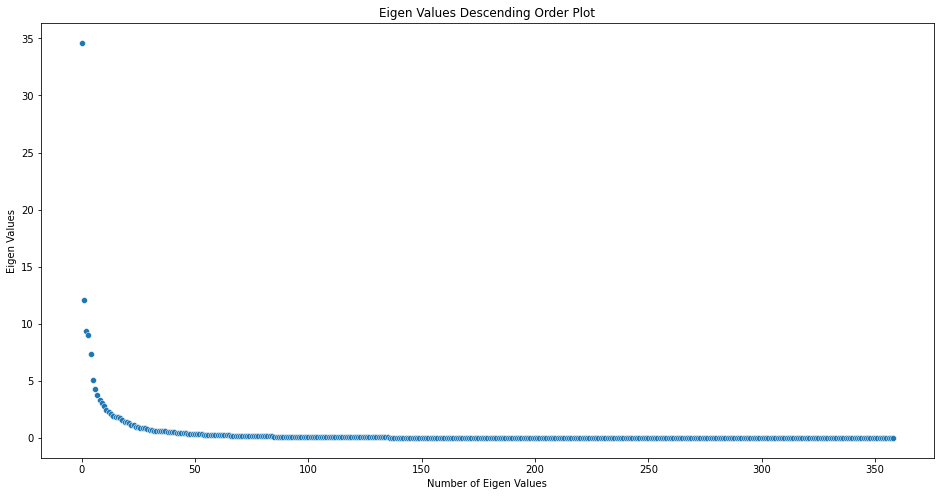

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca()
sns.scatterplot(x=iter(range(len(face_eigval))), y=face_eigval, ax=ax)
ax.set_title("Eigen Values Descending Order Plot")
ax.set_xlabel('Number of Eigen Values')  
ax.set_ylabel('Eigen Values')

**Task b)**

In [ ]:
face_Z.shape

(2429, 2)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Principle Component 2')

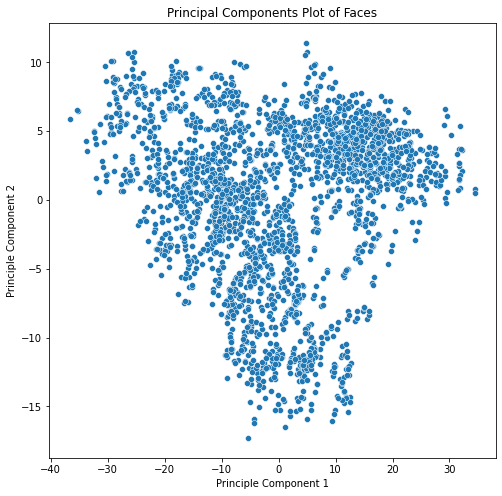

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.scatterplot(face_Z[:, 0], face_Z[:,1], ax=ax)
ax.set_title("Principal Components Plot of Faces")
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')

**Background List**

In [ ]:
'''
os.chdir(r'/content/drive/My Drive/CNN Visual Notebook/background')
lis = os.listdir()
bk_list = []
for data in lis:
  image = imread(data)
  bk_list.append(np.array(image))
'''

"\nos.chdir(r'/content/drive/My Drive/CNN Visual Notebook/background')\nlis = os.listdir()\nbk_list = []\nfor data in lis:\n  image = imread(data)\n  bk_list.append(np.array(image))\n"

In [ ]:
'''
fileobj = open(r"/content/drive/My Drive/CNN Visual Notebook/backgroundlist.pkl",'wb')
pickle.dump(bk_list,fileobj)
fileobj.close()
'''

'\nfileobj = open(r"/content/drive/My Drive/CNN Visual Notebook/backgroundlist.pkl",\'wb\')\npickle.dump(bk_list,fileobj)\nfileobj.close()\n'

In [ ]:
temp = open(r"background.pkl",'rb')
bk_list = pickle.load(temp)
temp.close()
bk_list = np.array(bk_list)

In [ ]:
bk_list.shape

(3699, 19, 19)

In [ ]:
final_bk_list = bk_list.reshape(3699, 361)

In [ ]:
ss =StandardScaler()
final_bk_list = ss.fit_transform(final_bk_list)

In [ ]:
bk_Z, bk_eigval, bk_eigvec, bk_u_reduce= pca_function(final_bk_list, k=2)

**Task c)**

In [ ]:
print(face_Z.shape)
print(bk_Z.shape)

(2429, 2)
(3699, 2)


In [ ]:
face_P = face_eigvec[:,:2]

In [ ]:
face_P.shape

(361, 2)

In [ ]:
face_means = np.mean(final_faces_list,axis=0)

In [ ]:
face_means.shape

(361,)

In [ ]:
back_to_face = np.dot(face_P.T,(final_bk_list - face_means).T)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Principle Component 2')

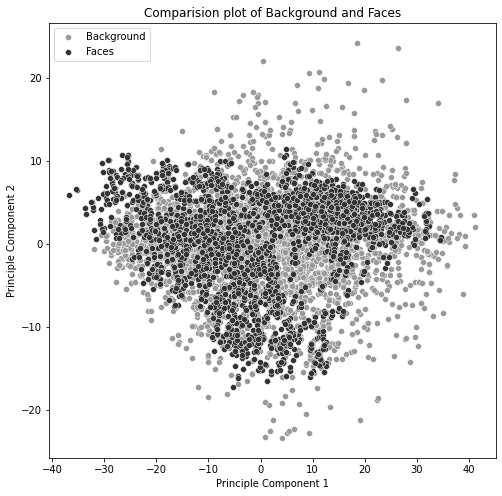

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.scatterplot(back_to_face[:, 0], back_to_face[:,1], ax=ax, color=".6", label='Background')
sns.scatterplot(face_Z[:, 0], face_Z[:,1], ax=ax, color=".2", label='Faces')
ax.set_title("Comparision plot of Background and Faces")
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle Component 2')

**Task d)**

Faces

In [ ]:
x = reconstruction(face_Z, face_u_reduce)

In [ ]:
temp_face=[]
for i in range(final_faces_list.shape[0]):
  temp_face.append(euclidean(final_faces_list[i, :], x[i, :]))

In [ ]:
temp_face = np.array(temp_face)
temp_face = temp_face[:, np.newaxis]
temp_face.shape

(2429, 1)

In [ ]:
face_Z, face_eigval, face_eigvec, face_u_reduce= pca_function(final_faces_list, k=1)

In [ ]:
face_Z.shape

(2429, 1)

Background

In [ ]:
x = reconstruction(bk_Z, bk_u_reduce)

In [ ]:
temp=[]
for i in range(final_bk_list.shape[0]):
  temp.append(euclidean(final_bk_list[i, :], x[i, :]))

In [ ]:
temp = np.array(temp)
temp = temp[:, np.newaxis]
temp.shape

(3699, 1)

In [ ]:
bk_Z, bk_eigval, bk_eigvec, bk_u_reduce= pca_function(final_bk_list, k=1)

In [ ]:
bk_Z.shape

(3699, 1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Coordinates of the projections of Eigenvector')

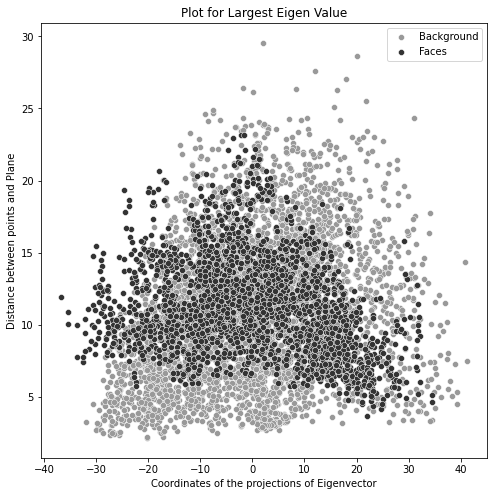

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.scatterplot(bk_Z[:,0],temp[:, 0],  ax=ax, color=".6", label='Background')
sns.scatterplot(face_Z[:,0],temp_face[:, 0],  ax=ax, color=".2", label='Faces')
ax.set_title("Plot for Largest Eigen Value")
ax.set_ylabel('Distance between points and Plane')
ax.set_xlabel('Coordinates of the projections of Eigenvector')

**Task e)** 

In [ ]:
face_Z, face_eigval, face_eigvec, face_u_reduce= pca_function(final_faces_list, k=2)

In [ ]:
x = reconstruction(bk_Z, bk_u_reduce)

In [ ]:
x.shape

(3699, 361)

In [ ]:
temp=[]
for i in range(final_bk_list.shape[0]):
  temp.append(euclidean(final_bk_list[i, :], x[i, :]))

In [ ]:
temp = np.array(temp)
temp = temp[:, np.newaxis]
temp.shape

(3699, 1)

In [ ]:
bk_Z, bk_eigval, bk_eigvec, bk_u_reduce= pca_function(final_bk_list, k=2)

In [ ]:
x = reconstruction(bk_Z, bk_u_reduce)

In [ ]:
temp=[]
for i in range(final_bk_list.shape[0]):
  temp.append(euclidean(final_bk_list[i, :], x[i, :]))

In [ ]:
temp = np.array(temp)
temp = temp[:, np.newaxis]
temp.shape

(3699, 1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Coordinates of the projections of Eigenvector')

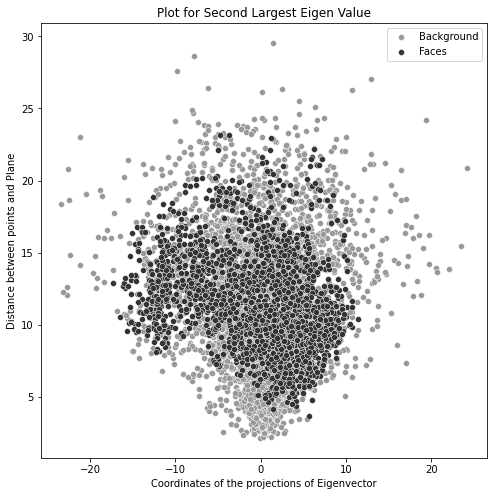

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
sns.scatterplot(bk_Z[:,1],temp[:, 0],  ax=ax, color=".6", label='Background')
sns.scatterplot(face_Z[:,1],temp_face[:, 0],  ax=ax, color=".2", label='Faces')
ax.set_title("Plot for Second Largest Eigen Value")
ax.set_ylabel('Distance between points and Plane')
ax.set_xlabel('Coordinates of the projections of Eigenvector')